# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site

site_copy = df.copy()
site_copy['site'] = site_copy['site'].str.strip().str.lower().str.replace("_"," ").str.replace("  "," ")
site_summary = (
    site_copy.groupby('site')[['age', 'bmi', 'systolic_bp']].mean().reset_index()
)

print(site_summary)



     site        age        bmi  systolic_bp
0  site a  56.364005  25.875183   117.354284
1  site b  62.401957  25.706681   117.130675
2  site c  57.312108  25.789583   117.978359
3  site d  63.491006  25.565682   117.943662
4  site e  57.064897  25.476502   117.503080


In [8]:
# TODO: Count by intervention group

df_copy = df.copy()
df_copy['intervention_group'] = (
    df_copy['intervention_group']
    .str.strip()
    .str.lower()
    .str.replace("_", " ")
    .str.split()
    .str.join(" ")
    .replace({
        "contrl": "control",
        "treatmen a": "treatment a",
        "treatmenta": "treatment a"
    })
)

intervention_group_counts = (
    df_copy.groupby('intervention_group').size().reset_index(name = 'patient_count')
)

print(intervention_group_counts)


  intervention_group  patient_count
0            control           3337
1        treatment a           3321
2        treatment b           3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [9]:
# TODO: Use summarize_by_group utility
agg_dict = {
    'age': ['mean', 'std'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'std']
 }

overall_stats = summarize_by_group(site_copy, group_col = 'site', agg_dict = agg_dict)

print(overall_stats)


              age                    bmi           systolic_bp           
             mean         std       mean       std        mean        std
site                                                                     
site a  56.364005  162.536292  25.875183  4.983102  117.354284  14.109332
site b  62.401957  139.050180  25.706681  5.017423  117.130675  13.532200
site c  57.312108  157.941868  25.789583  5.417217  117.978359  13.974010
site d  63.491006  136.140058  25.565682  5.881319  117.943662  13.906298
site e  57.064897  157.697644  25.476502  6.084532  117.503080  14.696501


## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [10]:
# TODO: Multiple aggregations
site_overall = (
    site_copy.groupby('site')
        .agg({
           'age': ['mean', 'std', 'min', 'max'],
           'bmi': ['mean', 'std'],
           'systolic_bp': ['mean', 'median']
        })
)

print(site_overall.to_string(index=False))

      age                           bmi          systolic_bp       
     mean        std  min max      mean      std        mean median
56.364005 162.536292 -999 100 25.875183 4.983102  117.354284  117.0
62.401957 139.050180 -999 100 25.706681 5.017423  117.130675  117.0
57.312108 157.941868 -999 100 25.789583 5.417217  117.978359  118.0
63.491006 136.140058 -999 100 25.565682 5.881319  117.943662  118.0
57.064897 157.697644 -999 100 25.476502 6.084532  117.503080  117.0


## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

In [11]:
# TODO: Intervention group comparisons

# Change outcome_cvd to numeric 
df_copy['outcome_cvd'] = df_copy['outcome_cvd'].str.strip().str.lower().map({'yes': 1, 'no': 0})

# Calculate mean outcome_cvd rate by intervention_group
cvd_summary = (df_copy.groupby('intervention_group')['outcome_cvd'].mean().reset_index(name = 'mean_outcome_cvd'))

print(cvd_summary)

# Calculate mean adherence_pct by intervention_group
adherence_summary = (df_copy.groupby('intervention_group')['adherence_pct'].mean().reset_index(name='mean_adherence_pct'))   

print(adherence_summary)

#Create a cross-tabulation of intervention_group vs dropout 
cross_tab_inter_dropout = pd.crosstab(df_copy['intervention_group'], df_copy['dropout'])

print(cross_tab_inter_dropout) 





  intervention_group  mean_outcome_cvd
0            control          0.336530
1        treatment a          0.319482
2        treatment b          0.333633
  intervention_group  mean_adherence_pct
0            control           60.621688
1        treatment a           60.210173
2        treatment b           61.009404
dropout               No  Yes
intervention_group           
control             2831  506
treatment a         2831  490
treatment b         2871  471


<Figure size 1000x600 with 0 Axes>

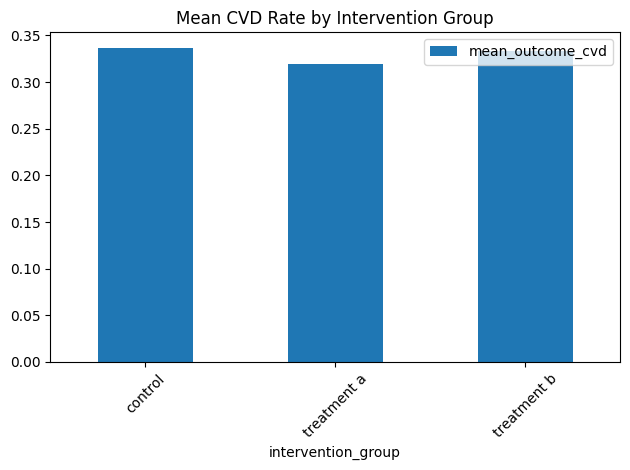

<Figure size 1000x600 with 0 Axes>

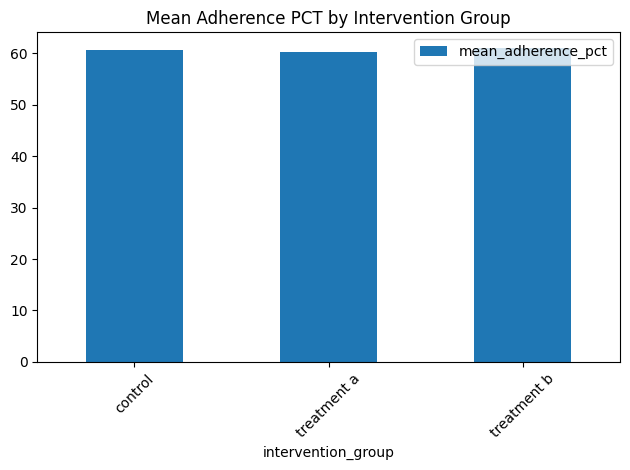

In [20]:
# TODO: Visualization


plot_group_comparison(cvd_summary, x_col = 'intervention_group', y_col = 'mean_outcome_cvd', title = "Mean CVD Rate by Intervention Group")
plot_group_comparison(adherence_summary, x_col = 'intervention_group', y_col = 'mean_adherence_pct', title = 'Mean Adherence PCT by Intervention Group')

                                


## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [13]:
# TODO: Save summary outputs

site_summary.to_csv('output/q7_site_summary.csv')

intervention_comparison = pd.merge(cvd_summary, adherence_summary, on = 'intervention_group')
intervention_comparison.to_csv('output/q7_intervention_comparison.csv')

report = [
    "Report of Key Findings",
    "========================",
    "1. Summary by Site:",
    "Mean of age, bmi and systolic blood pressure by site:",
    site_summary.to_string(index = False),
    "",
    "2. Intervention Group Comparison:",
    "Mean outcome cvd rate by intervention group:",
    cvd_summary.to_string(index=False),
    "Mean adherence_pct by intervention group:",
    adherence_summary.to_string(index=False)

]

with open('output/q7_analysis_report.txt', 'w') as f:
    f.write('\n'.join(report))





## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. When grouped by site, site d has the greatest mean in age,, but mean bmi and systolic_bp are pretty much the same throughout all sites. 
2. The mean outcome_cvd is highest in the control group. 
3. The mean adherence_pct is highest for Treatment B. 
